In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Jupyter visualization settings
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

In [8]:
# load wine dataset
wine = load_wine()
X, y = wine.data, wine.target
wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df['target'] = y

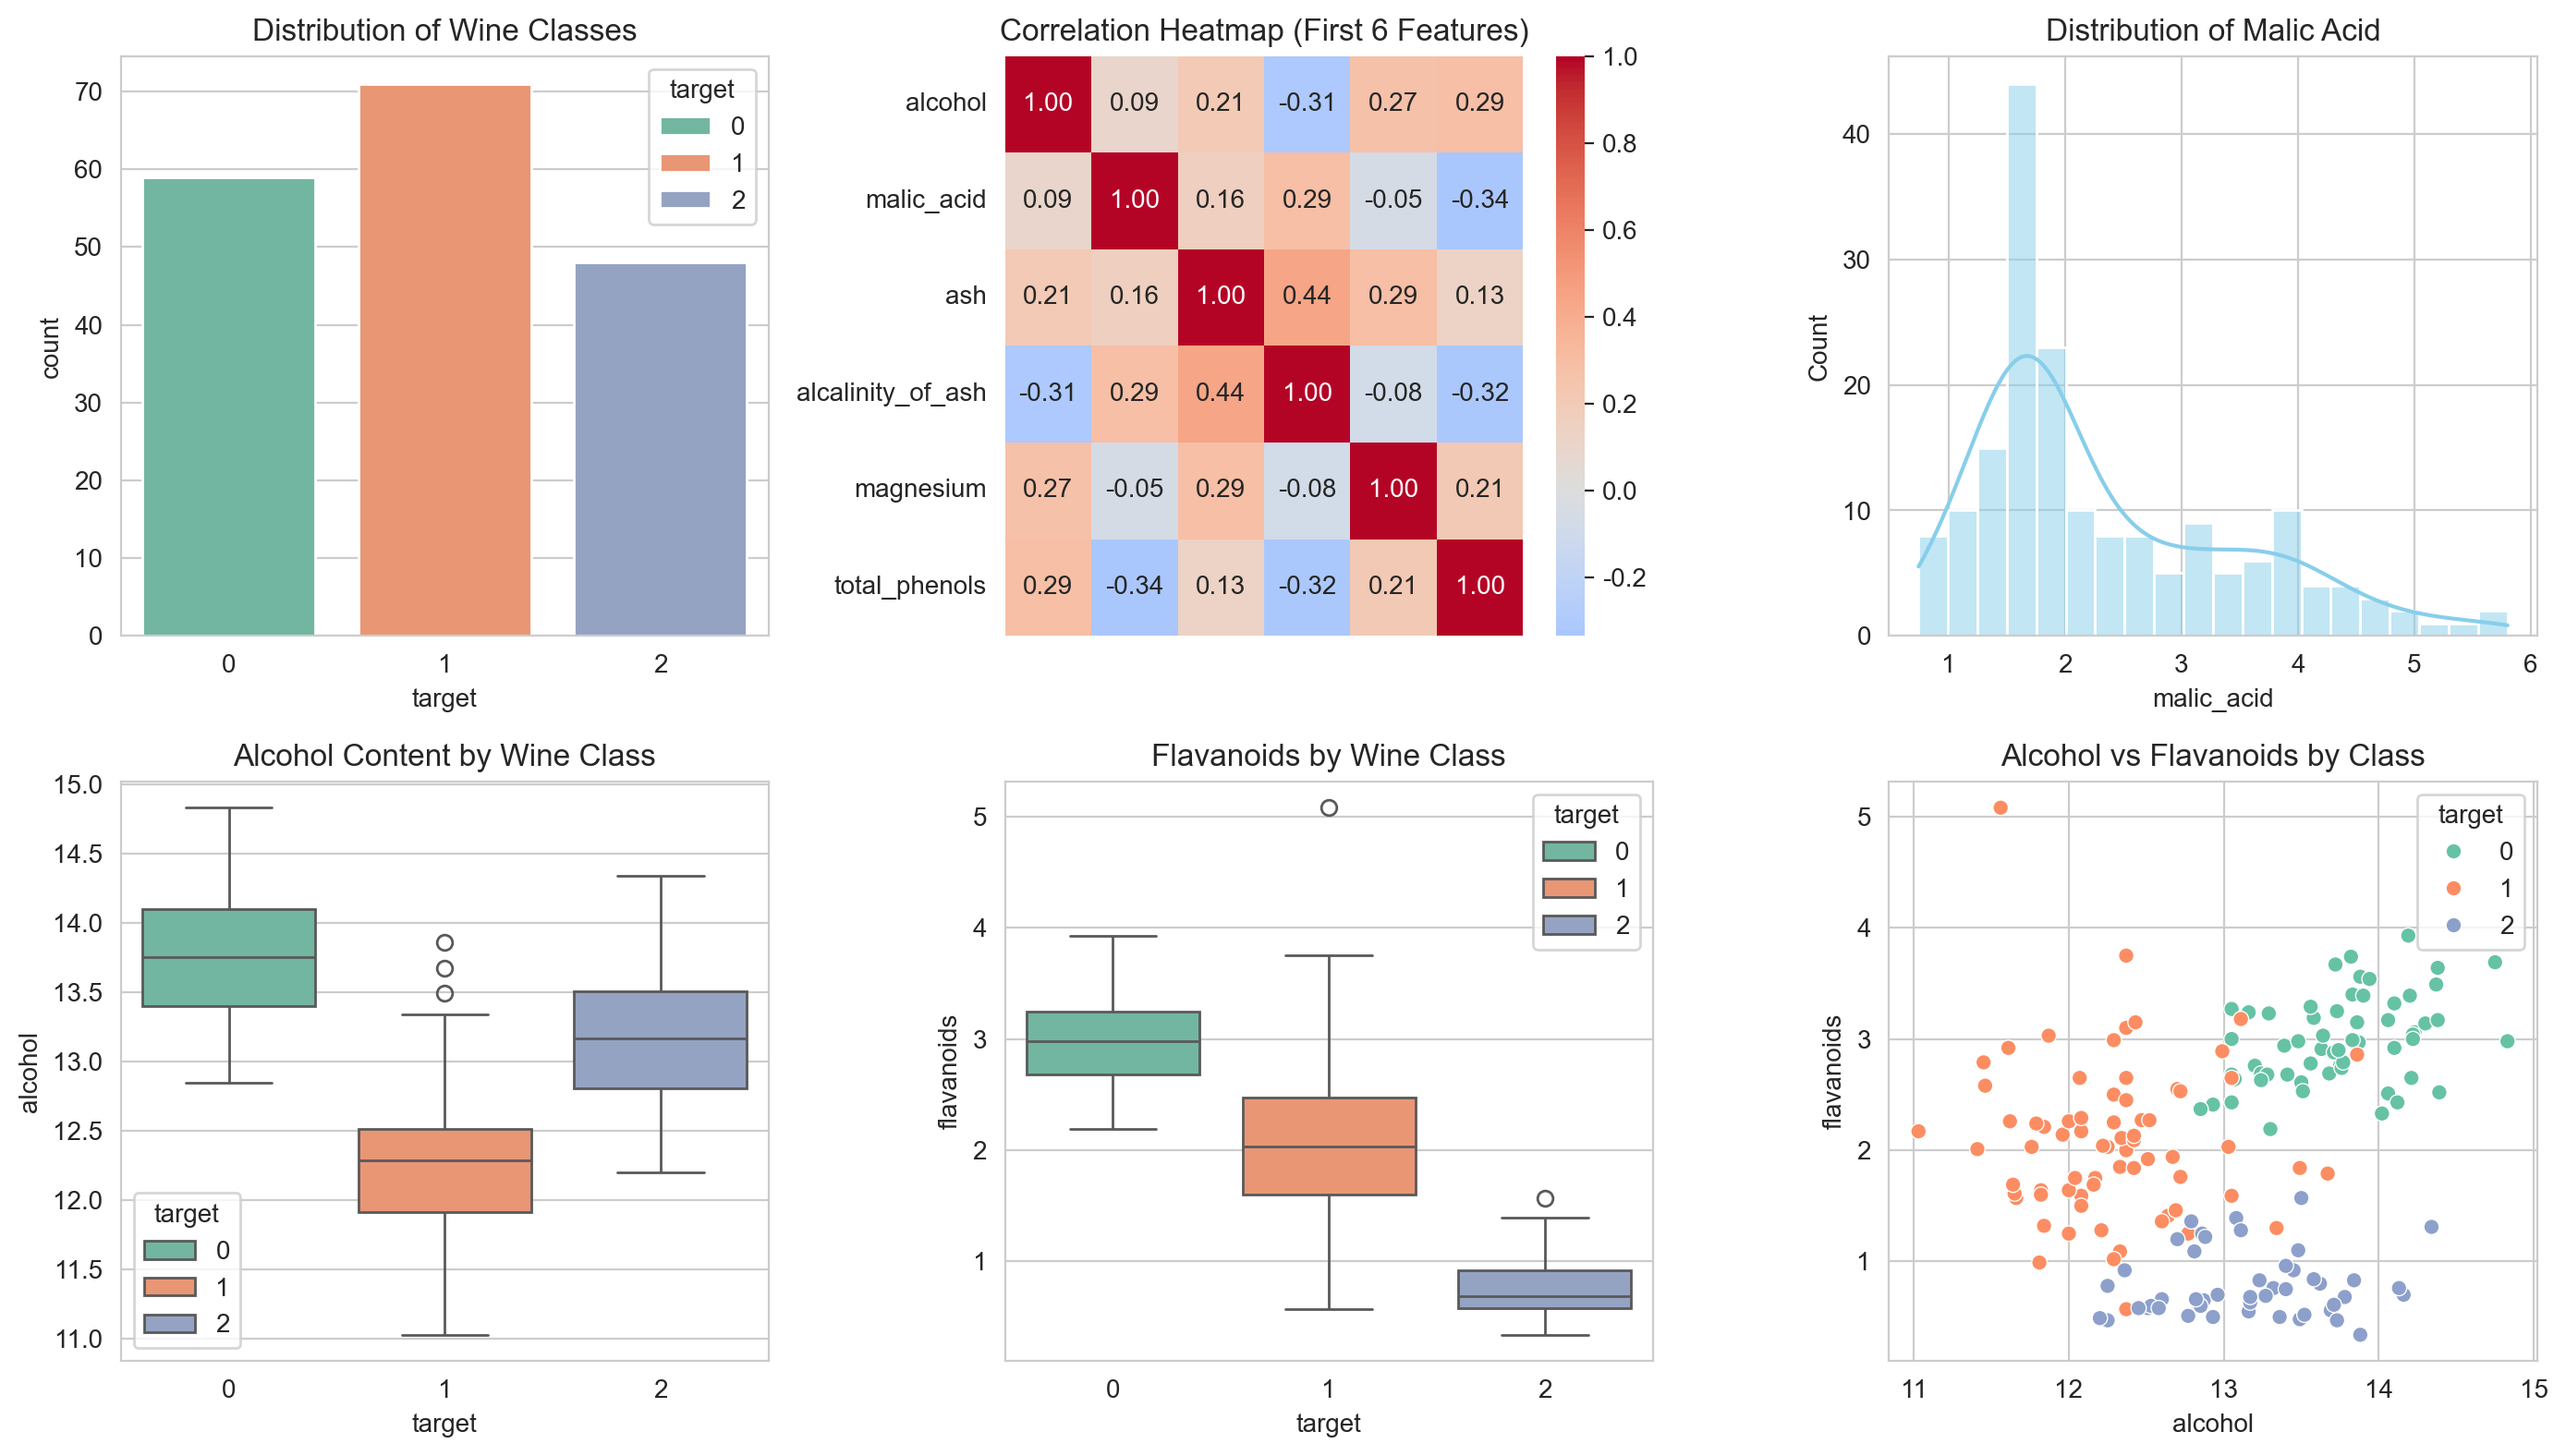

In [9]:
# visualize wine dataset
# 1 distribution of classes
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='target', data=wine_df, hue='target', palette='Set2')
plt.title('Distribution of Wine Classes')

# 2 correlation heatmap for first 6 features
plt.subplot(2, 3, 2)
selected_features = wine_df.iloc[:, :6]
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm', center=
0, fmt='.2f')
plt.title('Correlation Heatmap (First 6 Features)')
plt.xticks([])

# 3 histogram of a feature
plt.subplot(2, 3, 3)
sns.histplot(wine_df['malic_acid'], bins=20, kde=True,
                color='skyblue')
plt.title('Distribution of Malic Acid')

# 4 boxplot of alcohol content by class
plt.subplot(2, 3, 4)
sns.boxplot(x='target', y='alcohol', data=wine_df, hue='target', palette='Set2')
plt.title('Alcohol Content by Wine Class')

# 5 boxplot of flavanoids by class
plt.subplot(2, 3, 5)
sns.boxplot(x='target', y='flavanoids', data=wine_df, hue='target', palette='Set2')
plt.title('Flavanoids by Wine Class')

# 6 scatterplot of alcohol vs flavanoids colored by class
plt.subplot(2, 3, 6)
sns.scatterplot(x='alcohol', y='flavanoids', data=wine_df, hue='target', palette='Set2')
plt.title('Alcohol vs Flavanoids by Class')

plt.tight_layout()
plt.show()

In [10]:
# dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# logistic regression model training
log_reg = LogisticRegression(solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [12]:
# model evaluation
y_pred = log_reg.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

